In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense , MaxPooling2D , Conv2D , Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(x_train , y_train) , (x_test , y_test) = tf.keras.datasets.mnist.load_data() # load mnist dataset

11490434/11490434 [==============================] - 1s 0us/step


Train Datset Shape: (60000, 28, 28) , Test Dataset Shape: (10000, 28, 28)

First 9 Samples:


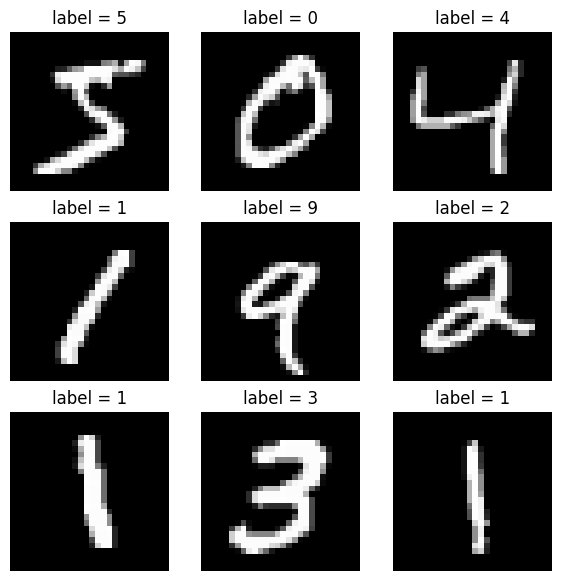

In [ ]:
print("Train Datset Shape: {} , Test Dataset Shape: {}\n".format(x_train.shape , x_test.shape))

#plotting first 9 images and label
print("First 9 Samples:")
plt.figure(figsize = (7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i] , cmap = 'gray') # show the image
  plt.title("label = " + str(y_train[i])) # label of the image as image title
  plt.axis('off')

plt.show()

Preprocessing Dataset:

In [ ]:
x_train = np.reshape(x_train , (x_train.shape[0] , x_train.shape[1] , x_train.shape[2] , 1)) #reshape in 4D x_train
x_test = np.reshape(x_test , (x_test.shape[0] , x_test.shape[1] , x_test.shape[2] , 1)) # reshape in 4D x_test

x_train = x_train.astype('float32') / 255 # normalizing in range 0 to 1
x_test = x_test.astype('float32') / 255 # normalizing in range 0 to 1

y_train = to_categorical(y_train , 10) # one hot encoding of y_train
y_test = to_categorical(y_test , 10) # one hot encoding of y_test

Building model architecture:

In [ ]:
model = tf.keras.Sequential() # define sequential model

model.add(Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu",input_shape=(28,28,1))) # convlution layer
model.add(MaxPooling2D(pool_size = (2,2))) # Maxpooling for down sampling
model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding='valid',activation="relu")) # second Convolution layer
model.add(MaxPooling2D(pool_size = (2,2))) # Maxpooling for down sampling
model.add(Flatten()) # Flatten layer for 1D transformation
model.add(Dense(units = 64 , activation = "relu")) # Fully connected layer of 64 units
model.add(Dense(units = 10 , activation = "softmax")) # output layer with 10 units as number of class = 10

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 64)                1

In [ ]:
# Compile the model
model.compile(optimizer="adam",loss = "categorical_crossentropy" , metrics = ["acc"])

In [ ]:
# Fit the model with train dataset
model.fit(x_train,y_train,batch_size = 32 , epochs = 10) # train with 10 epochs

In [ ]:
history = model.evaluate(x_test , y_test , verbose = 0)
acc = history[1] * 100

print("Accuracy: %.2f" % acc,"%")

Accuracy: 99.02 %


1/1 [==============================] - 0s 83ms/step
First 9 test images and predicted output:


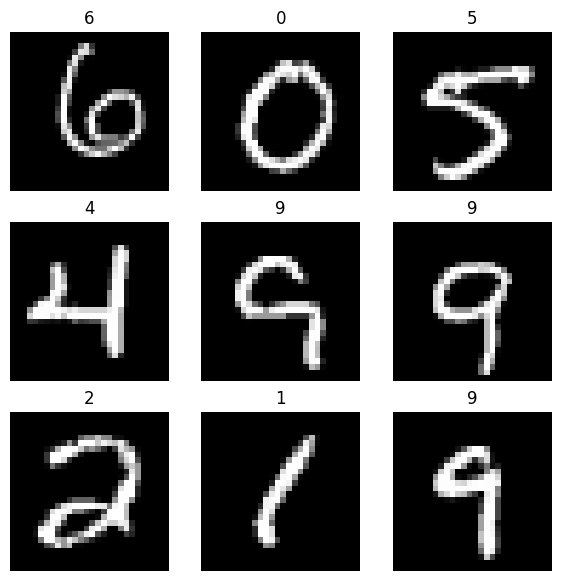

In [ ]:
#plotting first 9 images and predicted output

test_img = x_test[100:109]
test_predictions = model.predict(test_img)

print("First 9 test images and predicted output:")
plt.figure(figsize = (7,7))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(test_img[i] , cmap = 'gray') # show the image
  plt.title(str(np.argmax(test_predictions[i]))) # predicted output of the image as image title
  plt.axis('off')

plt.show()